<a href="https://colab.research.google.com/github/informatikasda-del/Tugas_PCD/blob/main/pertemuan7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

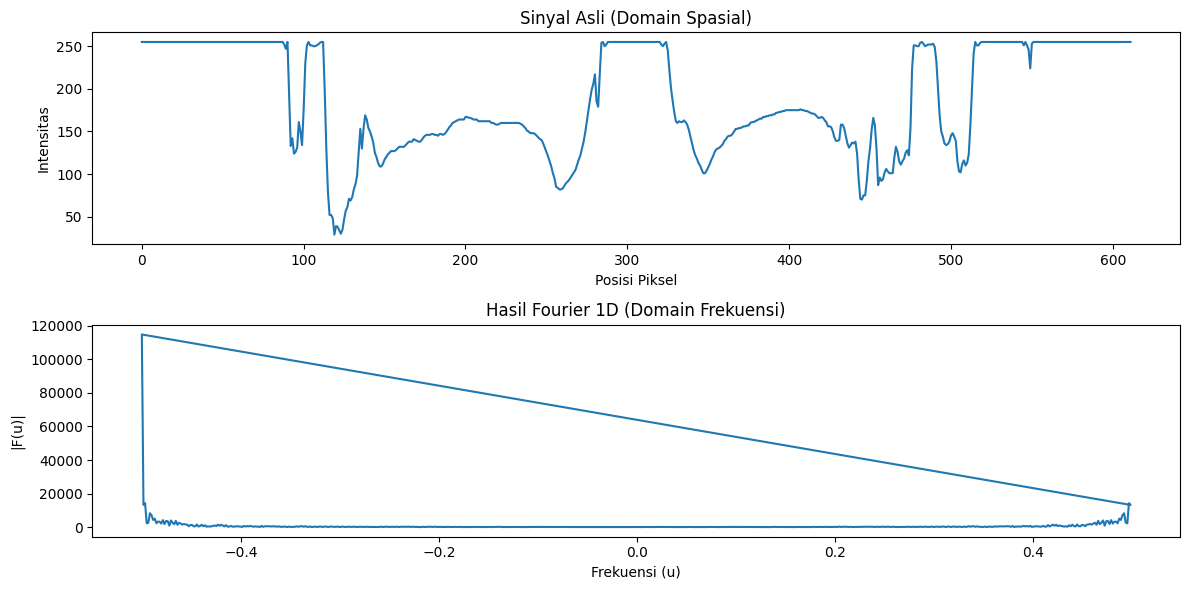

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale
img = cv2.imread('tomat.jpg', 0)

# 2. Ambil satu baris (misal baris ke-100) sebagai sinyal 1D
row = img[100, :]   # sinyal spasial 1D

# 3. Lakukan Fourier Transform 1D
F = np.fft.fft(row)
Fshift = np.fft.fftshift(F)

# 4. Hitung magnitude spectrum
magnitude = np.abs(Fshift)
freq = np.fft.fftfreq(len(row))

# 5. Tampilkan hasil
plt.figure(figsize=(12,6))


plt.subplot(2,1,1)
plt.plot(row)
plt.title('Sinyal Asli (Domain Spasial)')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')

plt.subplot(2,1,2)
plt.plot(freq, magnitude)
plt.title('Hasil Fourier 1D (Domain Frekuensi)')
plt.xlabel('Frekuensi (u)')
plt.ylabel('|F(u)|')
plt.tight_layout()
plt.show()


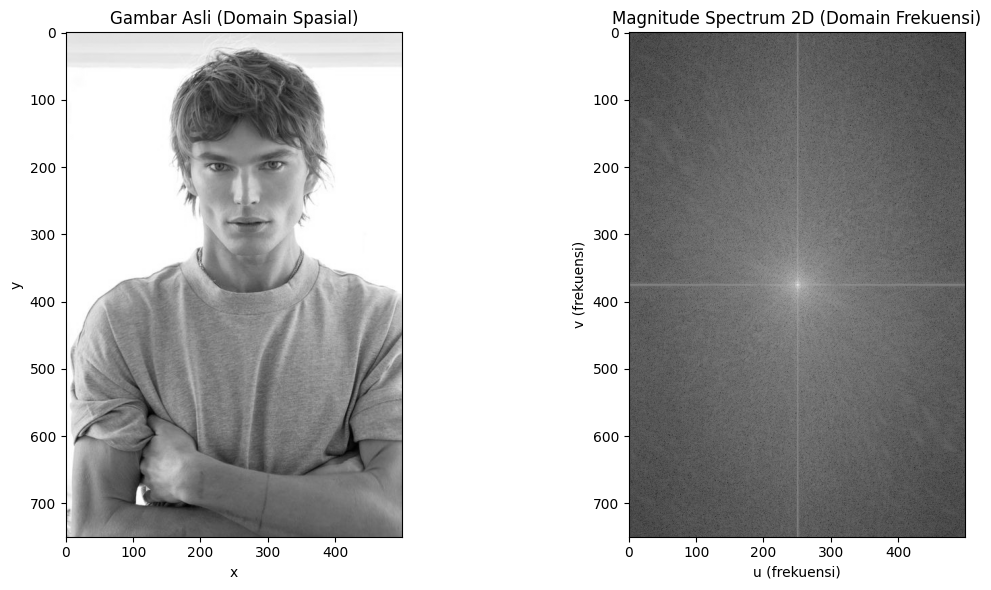

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale
img = cv2.imread('jordan_baret.jpg', 0)

# 2. Tampilkan gambar spasial (domain spasial 2D)
# (tidak perlu ambil baris karena ini 2D)
spatial = img.copy()

# 3. Lakukan Fourier Transform 2D
F = np.fft.fft2(spatial)          # FFT 2D
Fshift = np.fft.fftshift(F)       # geser DC ke tengah

# 4. Hitung magnitude spectrum (untuk ditampilkan)
magnitude = np.log1p(np.abs(Fshift))   # pakai log agar spektrum terlihat

# 5. Tampilkan hasil
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(spatial, cmap='gray')
plt.title('Gambar Asli (Domain Spasial)')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1,2,2)
plt.imshow(magnitude, cmap='gray')
plt.title('Magnitude Spectrum 2D (Domain Frekuensi)')
plt.xlabel('u (frekuensi)')
plt.ylabel('v (frekuensi)')

plt.tight_layout()
plt.show()


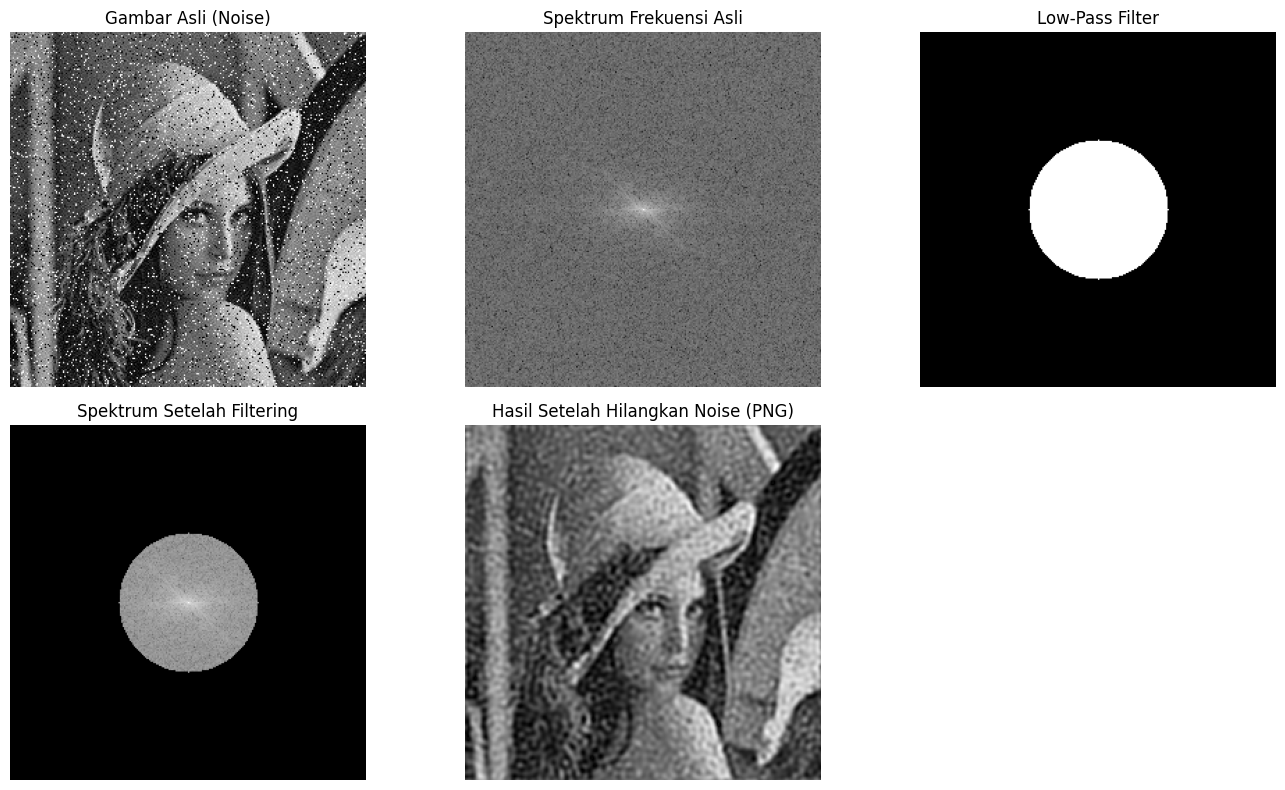

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale (PNG)
img = cv2.imread('noise.png', 0)

# 2. FFT 2D
F = np.fft.fft2(img)
Fshift = np.fft.fftshift(F)

# 3. Buat Low-Pass Filter (LPF)
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2   # pusat frekuensi

radius = 50   # cutoff (ubah sesuai kebutuhan)

mask = np.zeros((rows, cols), dtype=np.uint8)
cv2.circle(mask, (ccol, crow), radius, 1, -1)

# 4. Terapkan filter pada domain frekuensi
F_filtered = Fshift * mask

# 5. Inverse FFT → kembali domain spasial
F_ishift = np.fft.ifftshift(F_filtered)
img_filtered = np.fft.ifft2(F_ishift)
img_filtered = np.abs(img_filtered)

# 6. Magnitude spectrum
magnitude_original = np.log1p(np.abs(Fshift))
magnitude_filtered = np.log1p(np.abs(F_filtered))

# 7. Tampilkan hasil
plt.figure(figsize=(14,8))

plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title('Gambar Asli (Noise)')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(magnitude_original, cmap='gray')
plt.title('Spektrum Frekuensi Asli')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(mask, cmap='gray')
plt.title('Low-Pass Filter')
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(magnitude_filtered, cmap='gray')
plt.title('Spektrum Setelah Filtering')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(img_filtered, cmap='gray')
plt.title('Hasil Setelah Hilangkan Noise (PNG)')
plt.axis('off')

plt.tight_layout()
plt.show()


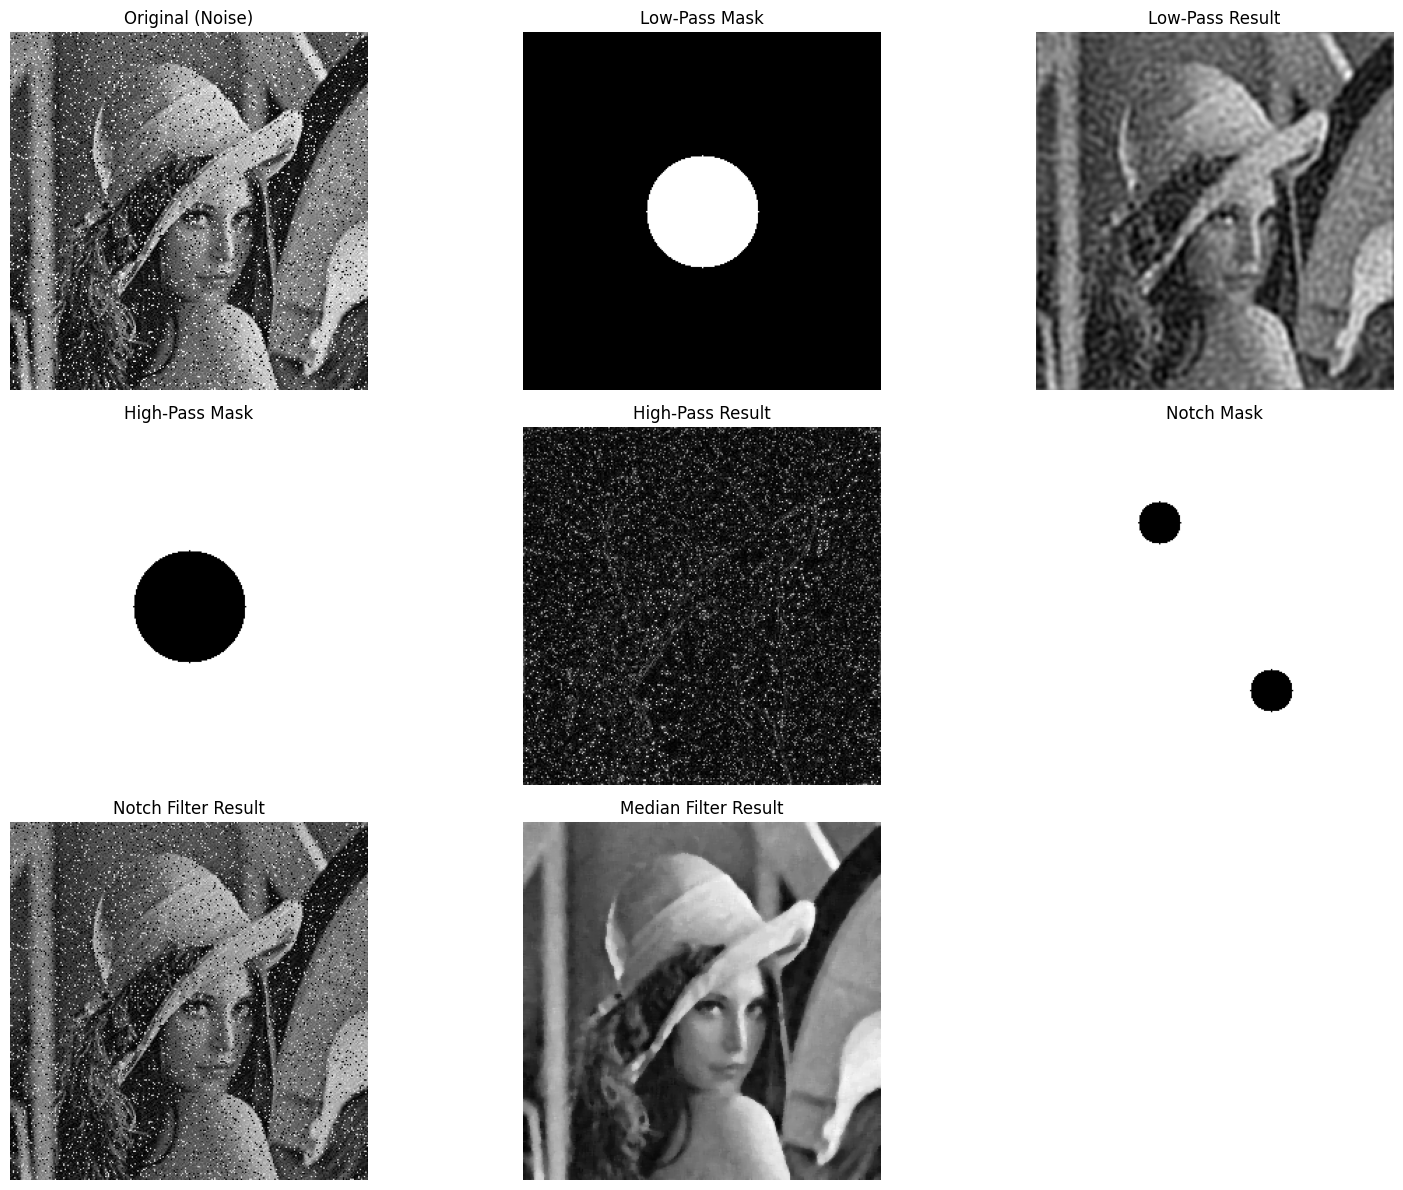

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. BACA GAMBAR (PNG)
# ==========================================
img = cv2.imread('tampilan.png', 0)

rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

# FFT
F = np.fft.fft2(img)
Fshift = np.fft.fftshift(F)

# ==========================================
# 2. LOW-PASS FILTER (LPF)
# ==========================================
radius_LP = 40
mask_LP = np.zeros((rows, cols), np.uint8)
cv2.circle(mask_LP, (ccol, crow), radius_LP, 1, -1)

F_LP = Fshift * mask_LP
LP_img = np.abs(np.fft.ifft2(np.fft.ifftshift(F_LP)))

# ==========================================
# 3. HIGH-PASS FILTER (HPF)
# ==========================================
radius_HP = 40
mask_HP = np.ones((rows, cols), np.uint8)
cv2.circle(mask_HP, (ccol, crow), radius_HP, 0, -1)

F_HP = Fshift * mask_HP
HP_img = np.abs(np.fft.ifft2(np.fft.ifftshift(F_HP)))

# ==========================================
# 4. NOTCH FILTER (Hilangkan frekuensi tertentu)
# ==========================================
mask_notch = np.ones((rows, cols), np.uint8)

# Ukuran notch
d = 15

# Dua posisi notch (contoh, bisa diubah sesuai spektrum noise)
notches = [
    (crow + 60, ccol + 40),
    (crow - 60, ccol - 40)
]

for y, x in notches:
    cv2.circle(mask_notch, (x, y), d, 0, -1)

F_notch = Fshift * mask_notch
notch_img = np.abs(np.fft.ifft2(np.fft.ifftshift(F_notch)))

# ==========================================
# 5. MEDIAN FILTER (domain spasial)
# ==========================================
median_img = cv2.medianBlur(img, 5)

# ==========================================
# 6. TAMPILKAN SEMUA HASIL
# ==========================================
plt.figure(figsize=(16,12))

# Original
plt.subplot(3,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original (Noise)")
plt.axis('off')

# LPF
plt.subplot(3,3,2)
plt.imshow(mask_LP, cmap='gray')
plt.title("Low-Pass Mask")
plt.axis('off')

plt.subplot(3,3,3)
plt.imshow(LP_img, cmap='gray')
plt.title("Low-Pass Result")
plt.axis('off')

# HPF
plt.subplot(3,3,4)
plt.imshow(mask_HP, cmap='gray')
plt.title("High-Pass Mask")
plt.axis('off')

plt.subplot(3,3,5)
plt.imshow(HP_img, cmap='gray')
plt.title("High-Pass Result")
plt.axis('off')

# Notch Filter
plt.subplot(3,3,6)
plt.imshow(mask_notch, cmap='gray')
plt.title("Notch Mask")
plt.axis('off')

plt.subplot(3,3,7)
plt.imshow(notch_img, cmap='gray')
plt.title("Notch Filter Result")
plt.axis('off')

# Median
plt.subplot(3,3,8)
plt.imshow(median_img, cmap='gray')
plt.title("Median Filter Result")
plt.axis('off')

plt.tight_layout()
plt.show()
